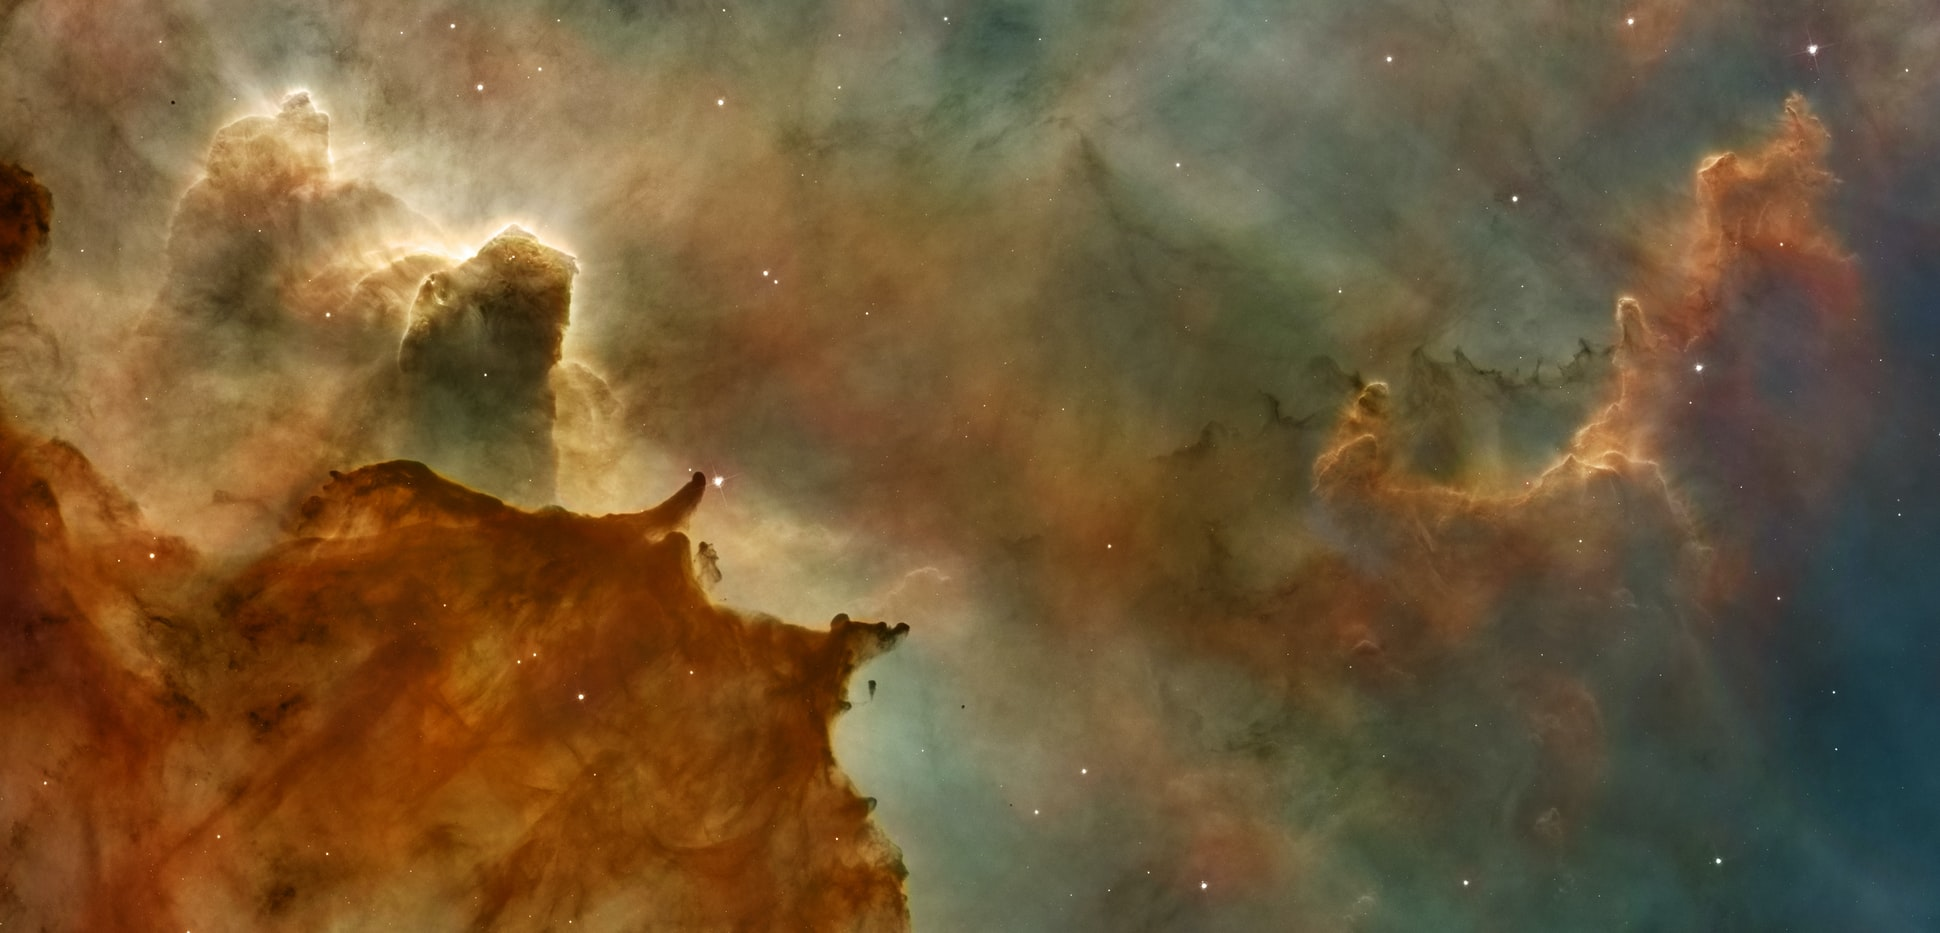

In [24]:
from IPython.display import Image
Image('images/nasa.jpg')

# All Missions Space from 1957

### Hi there, what do you think of learning a little more with the data that we have at our disposal in Kaggle, I am fascinated by astrophysics I decided to get data from all missions into space since 1957. 
### So let's see and learn a little more about how to do exploratory data analysis with Python huhuh :) and already collect insights
### Dataset Link: https://www.kaggle.com/agirlcoding/all-space-missions-from-1957 and let's go.

# Data Collection
#### The data that we will use is in the link above, what you will do is download and unzip, when downloading it you can choose the csv format.

## Libraries

In [25]:
# Library for data analysis and data structure with high performance and also easy to use.
import pandas as pd 

# Seaborn library for data visualization, for creating sophisticated graphics
import seaborn as sns 

# And we will use seaborn so that every time we print the graphs we can have the grid lines
# and a white background for a better understanding of the information that will be presented.
sns.set(style = 'whitegrid') 

# To ignore possible warnings
import warnings
warnings.filterwarnings('ignore')

# And in addition we will also call the matplotlib set of functions, pyplot allows you to create figures and graphs
import matplotlib.pyplot as plt 

# And lastly, if we want to visualize here on the jupyter notebook the graphics that we are going to create we will need this method
%matplotlib inline 

# Loading the Data

#### To upload a file in csv format we can call the pandas library which will also help us in the course of our analysis


#### This done we will load the file, remembering that the file has to be in the same directory where your jupyter notebook is
#### If it is in another directory just enter the full path.

In [26]:
# Loading the dataset
df = pd.read_csv('files/datasets_828921_1417131_Space_Corrected.csv')

# Data organization and Exploratory Analysis
##### * Selecting Columns that we will not use
##### * Renaming columns
##### * Adding new columns
##### * Identifying null values and replacing

In [27]:
# Viewing the first 5 lines of the dataset
df.head()

,Unnamed: 0,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [28]:
# Selecting the dataset columns
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Company Name', 'Location', 'Datum',
       'Detail', 'Status Rocket', ' Rocket', 'Status Mission'],
      dtype='object')

In [29]:
# Selecting the columns we will use
df = df[['Company Name', 'Location', 'Datum', 'Detail', 'Status Rocket', ' Rocket', 'Status Mission']]

# Renaming the 'Rocket' column to 'Cost_Mission'
df.rename(columns = {
    ' Rocket':'Cost_Mission',
    'Datum':'Date_Time'
}, inplace = True)

In [30]:
# Add the 'Year' and 'Country' columns

# Add the 'Year' column
df['Year'] = df.Date_Time.str.split(' ').str[3]

# Add the 'Country' column
df['Country'] = df.Location.str.split(',').str[-1]

# Correcting the names of some countries that are wrong
replace_countries = {
    'Russia' : 'Russian Federation',
    "Shahrud Missile Test Site": "Iran",
    'New Mexico' : 'USA',
    "Yellow Sea": 'China',
    "Barents Sea": 'Russian Federation',
    "Pacific Missile Range Facility": 'USA',
    "Gran Canaria": 'USA'
}
df['Country'] = df['Country'].replace(replace_countries)

# Add the 'Month' column
df['Month'] = df.Date_Time.str.split(' ').str[1]

In [31]:
# Viewing data types
df.dtypes

Company Name      object
Location          object
Date_Time         object
Detail            object
Status Rocket     object
Cost_Mission      object
Status Mission    object
Year              object
Country           object
Month             object
dtype: object

In [32]:
# Replacing the characters in the 'Cost_Mission' column
df.Cost_Mission = df.Cost_Mission.str.replace(',', '')

# Change the data type of the 'Cost_Mission' column
df.Cost_Mission = df.Cost_Mission.astype(float)

# Change the format of the 'Date_Time' column
df.Date_Time = pd.to_datetime(df['Date_Time']).apply(lambda x: x.strftime("%Y-%m-%d %H:%M:%S"))

In [33]:
# Viewing the first 3 lines of the dataset
df.head(3)

,Company Name,Location,Date_Time,Detail,Status Rocket,Cost_Mission,Status Mission,Year,Country,Month
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,2020,USA,Aug
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020,China,Aug
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020,USA,Aug


In [34]:
# Checking for null values
df.isnull().sum()

Company Name         0
Location             0
Date_Time            0
Detail               0
Status Rocket        0
Cost_Mission      3360
Status Mission       0
Year                 0
Country              0
Month                0
dtype: int64

In [35]:
# Replacing null values by 0
df.fillna(0, inplace = True)

In [36]:
# Viewing the first 3 lines of the dataset
df.head(3)

,Company Name,Location,Date_Time,Detail,Status Rocket,Cost_Mission,Status Mission,Year,Country,Month
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,2020,USA,Aug
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020,China,Aug
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00,Starship Prototype | 150 Meter Hop,StatusActive,0.00,Success,2020,USA,Aug


# Filtered and organized data, now let's analyze our dataset
##### * Statistics
##### * Data Visualization


# Since 1957 how many Missions have been carried out until today (2020), presenting by mission status?

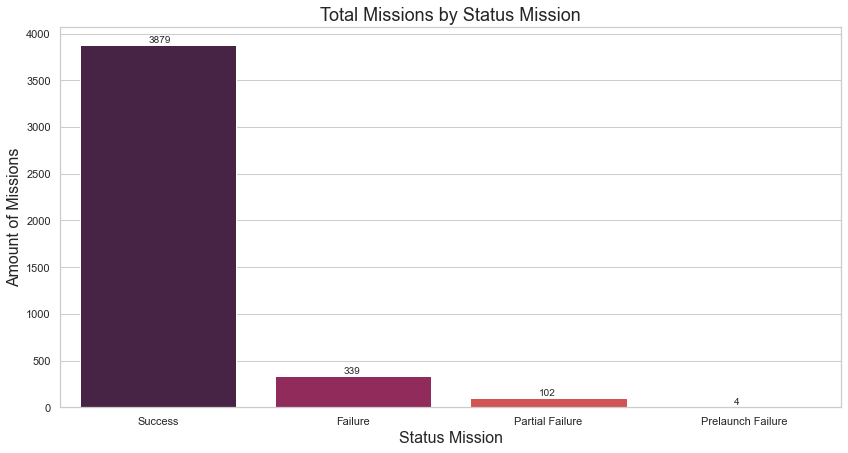

In [37]:
# Setting the size of the chart figure
fig = plt.subplots(figsize = (14, 7))

# Creating the chart
g = sns.barplot(
            x = df['Status Mission'].value_counts().index, 
            y = df['Status Mission'].value_counts().values, 
            data = df,
            palette = 'rocket')

# Chart title
plt.title('Total Missions by Status Mission', fontdict = {'size':18})

# Axis subtitles (x & y)
plt.xlabel('Status Mission', fontdict = {'size':16})
plt.ylabel('Amount of Missions', fontdict = {'size':16})

# Add labels to chart bars
for x in g.patches:
    g.annotate((int(x.get_height())), 
    (x.get_x()+0.35, 
    x.get_height()+20))

# What is the Distribution of Success Missions with by Year of Launch?

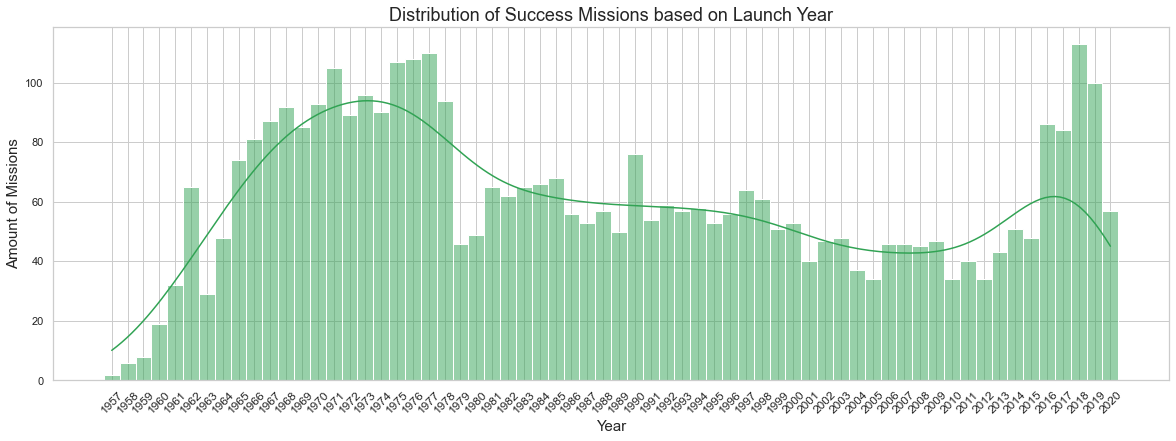

In [38]:
# Distribution of Success Missions based on Launch Year

# Filtering successful missions
mission_Success = df[df['Status Mission'] == 'Success']

# Setting the chart size
fig, x = plt.subplots(figsize=(20, 6.5))
g = sns.histplot(
    x = mission_Success.Year.sort_values(), 
    data = mission_Success, 
    color='#31a354', 
    kde = True
)

# Chart title
g.set_title('Distribution of Success Missions based on Launch Year', fontdict = {'size':18})

# Customizing the axes (x and y)
g.xaxis.set_label_text('Year', fontdict = {'size':15})
g.yaxis.set_label_text('Amount of Missions', fontdict = {'size':15})

# Customizing the chart labels
labels = mission_Success.Year.sort_values().unique()
g.set_xticklabels(labels, rotation = 45, ha = 'center', fontdict = {'size':12})
plt.show();

# Which companies were most successful in their launches?

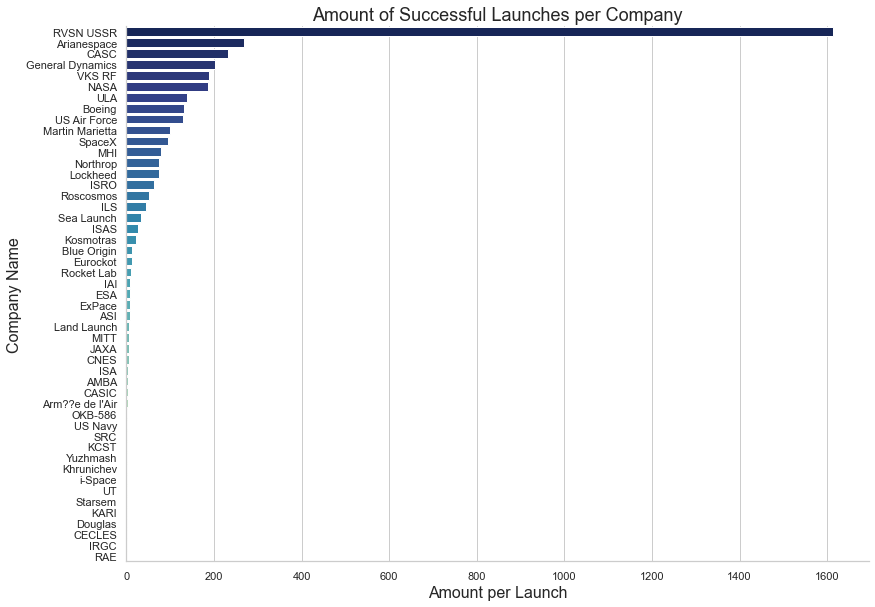

In [39]:
# Creating the chart
g = sns.catplot(
            x = mission_Success['Company Name'].value_counts().values,
            y = mission_Success['Company Name'].value_counts().index,
            data = mission_Success,
            kind = 'bar',
            aspect = 1.5,
            height = 8,
            palette = 'YlGnBu_r'
)

# Chart title
plt.title('Amount of Successful Launches per Company', fontdict = {'size':18})

# Define the axes (x & y)
plt.xlabel('Amount per Launch', fontdict = {'size':16})
plt.ylabel('Company Name', fontdict = {'size':16})

# Plotting the chart
plt.show()

# Which countries were most successful in their launches?

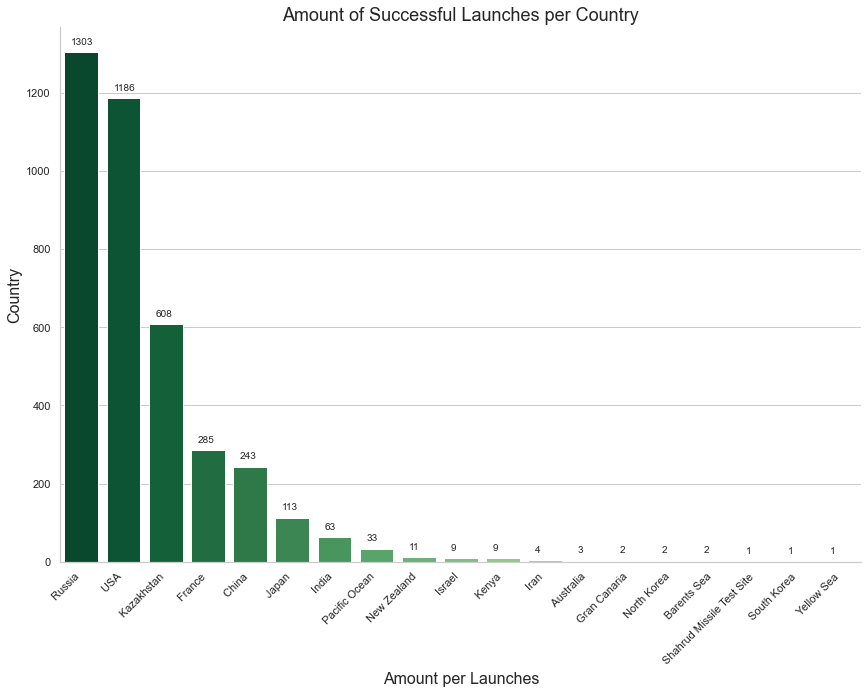

In [40]:
# Create the chart
g = sns.catplot(x = mission_Success.Country.value_counts().index,
            y = mission_Success.Country.value_counts().values,
            data = mission_Success,
            kind = 'bar',
            aspect = 1.5,
            height = 8,
            palette = 'YlGn_r'
)

# Chart title
plt.title('Amount of Successful Launches per Country', fontdict = {'size':18})

# Definindo os eixos (x & y)
plt.xlabel('Amount per Launches', fontdict = {'size':16})
plt.ylabel('Country', fontdict = {'size':16})

# Customizing the axis labels
g.set_xticklabels(rotation = 45, ha = 'right')

for i in g.ax.patches:
    g.ax.annotate((int(i.get_height())), 
    (i.get_x()+0.16, 
    i.get_height()+20))

# Plotting the chart
plt.show()

# What is the Average Cost of a Mission per Month, as well as the Status of the Mission?

In [41]:
# Average cost per mission

# Defining the variable to make the pivot
var = pd.DataFrame()

# Selecting only the cost of missions greater than zero
df_Cost_Mission = df[df['Cost_Mission'] > 0]

# Selecting the data and applying the average
for b in list(df_Cost_Mission.Month.unique()):
    for v in list(df_Cost_Mission['Status Mission'].unique()):
        z = df_Cost_Mission[(df_Cost_Mission.Month == b) & (df_Cost_Mission['Status Mission'] == v)]['Cost_Mission'].mean()
        var = var.append(pd.DataFrame({'Month':b , 'Status Mission':v , 'avgCost_Mission':z}, index=[0]))

# Resetting the index of our new dataset  
var = var.reset_index(drop = True)

# Filtering values and formats
var['avgCost_Mission'].fillna(0,inplace=True)
var['avgCost_Mission'].isnull().value_counts()
var['avgCost_Mission'] = var['avgCost_Mission'].astype(int)

# Viewing the first 5 lines of the new dataset
pd.DataFrame(var.head())

,Month,Status Mission,avgCost_Mission
0,Aug,Success,128
1,Aug,Failure,34
2,Aug,Partial Failure,0
3,Aug,Prelaunch Failure,0
4,Jul,Success,166


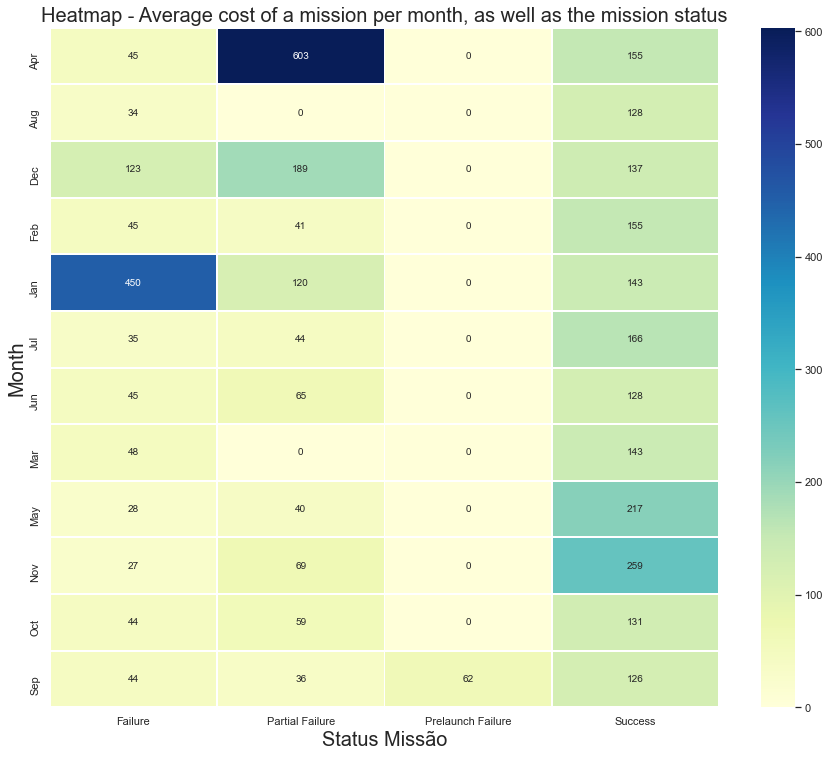

In [42]:
# Selecting the columns of our new dataset
tri = var.pivot('Month', 'Status Mission', 'avgCost_Mission')

# Creating the figure for the chart
fig, ax = plt.subplots(figsize=(15, 12.5))

# Creating the chart
sns.heatmap(tri, linewidths=1, cmap='YlGnBu', annot=True, ax=ax, fmt='d')

# Defining the chart title
ax.set_title('Heatmap - Average cost of a mission per month, as well as the mission status', fontdict={'size':20})

# Add title on the x and y axes
ax.xaxis.set_label_text('Status Missão',fontdict= {'size':20})
ax.yaxis.set_label_text('Month',fontdict= {'size':20})

# Plot the chart
plt.show()

# What is the Total Cost of Missions per Month?

Text(0, 0.5, 'Amount of Missions per Month')

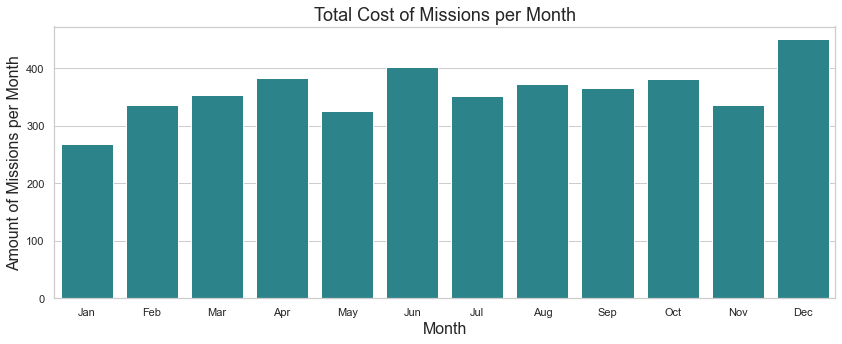

In [43]:
# Chart size
fig = plt.subplots(figsize = (14, 5))

# Creating the chart
g = sns.barplot(
    order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    x = df.Month.value_counts().index,
    y = df.Month.value_counts().values,
    data = df,
    color = '#1c9099'
)

# Chart title
plt.title('Total Cost of Missions per Month', fontdict = {'size':18})

# Axis labels (x & y)
plt.xlabel('Month', fontdict = {'size':16})
plt.ylabel('Amount of Missions per Month', fontdict = {'size':16})

# Which company has spent the most on its missions?

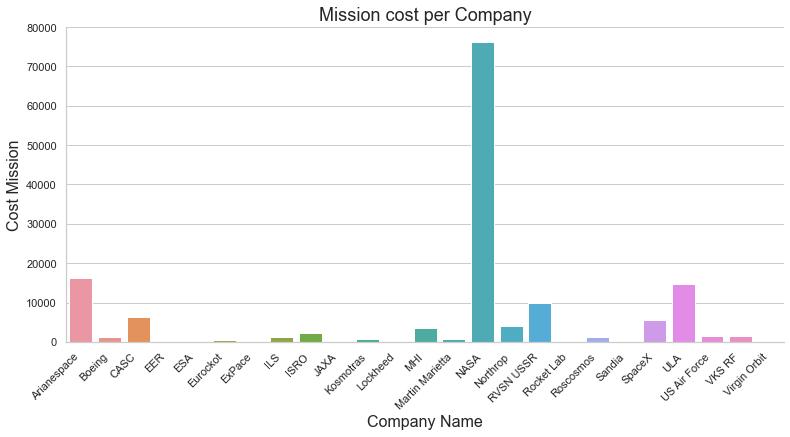

In [44]:
# Group the columns 
cost_mission_company = df.groupby(['Company Name'])['Cost_Mission'].sum().reset_index()

# Mission cost > zero
cost_mission_company = cost_mission_company[cost_mission_company['Cost_Mission'] > 0]

# Create the chart
g = sns.catplot(
    x = 'Company Name',
    y = 'Cost_Mission',
    data = cost_mission_company,
    kind = 'bar',
    aspect = 2.2
)

# Graphic title
g.ax.set_title('Mission cost per Company', fontdict = {'size':18})

# Customizing the axes (x and y)
plt.xlabel('Company Name', fontdict = {'size':16})
plt.ylabel('Cost Mission', fontdict = {'size':16})

# Customizing the x-axis labels
g.set_xticklabels(rotation = 45, ha = 'right');

# Comparing Russia with the USA over the years?

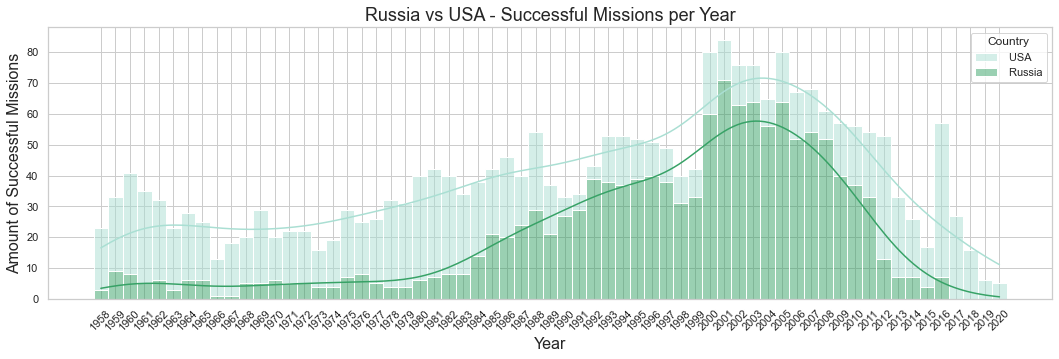

In [45]:
# Select the two countries, 'Russia' and 'USA'
russia_usa = df[df.Country.isin([' Russia', ' USA'])]

# Select all the successful missions
russia_usa_success = russia_usa[russia_usa['Status Mission'] == 'Success']

# Creating the graph figure
fig = plt.subplots(figsize = (18, 5))

# Creating the chart
g = sns.histplot(
    russia_usa_success,
    x = 'Year', hue = 'Country',
    palette = 'BuGn',
    multiple = 'stack',
    kde = True
);

# Chart title
plt.title('Russia vs USA - Successful Missions per Year', fontdict = {'size':18})

# Eixos x & y
plt.xlabel('Year', fontdict = {'size':16})
plt.ylabel('Amount of Successful Missions', fontdict = {'size':16})

# Customize the x-axis labels
labels = russia_usa_success.Year.sort_values().unique()
g.set_xticklabels(labels, rotation = 45)

# Print the chart
plt.show()

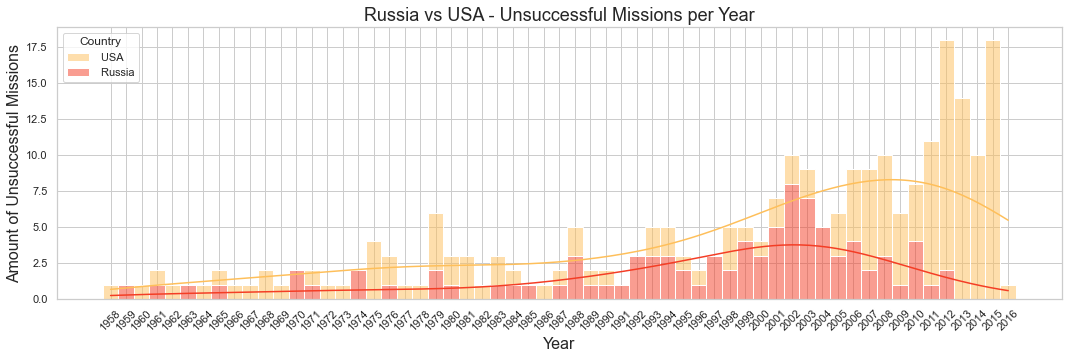

In [46]:
# Select all missions that were unsuccessful
russia_usa_failure = russia_usa[russia_usa['Status Mission'] != 'Success']

# Create the graph figure
fig = plt.subplots(figsize = (18, 5))

# Create the chart
g = sns.histplot(
    russia_usa_failure,
    x = 'Year', hue = 'Country',
    palette = 'YlOrRd',
    multiple = 'stack',
    kde = True
);

# Chart title
plt.title('Russia vs USA - Unsuccessful Missions per Year', fontdict = {'size':18})

# X & y axes
plt.xlabel('Year', fontdict = {'size':16})
plt.ylabel('Amount of Unsuccessful Missions', fontdict = {'size':16})

# Customize the x-axis labels
labels = russia_usa_success.Year.sort_values().unique()
g.set_xticklabels(labels, rotation = 45)

# Print the chart
plt.show()

# End...